In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from statistics import mean

# Set Helvetica as the default font
mpl.rcParams['font.family'] = 'Helvetica'

In [4]:
# load data
with open("../Data/IR35evolution.xlsx", 'rb') as f:
    data = pd.read_excel(f, sheet_name="data")

# Get labels (doesn't change order)
x = data["Name"]
l = [i[:-2] for i in list(x)]
IREDs = list(dict.fromkeys(l))

# set biosensor data to plot
yS = data["S-RFU/OD"]
yR = data["R-RFU/OD"]

#process data via a dictionary
data_dict = {}
for i in range(0,len(x)):
    l = x[i][:-2]
    if l not in data_dict:
        data_dict[l] = {"S": [yS[i]], "R": [yR[i]]}
    else:
        data_dict[l]["S"].append(yS[i])
        data_dict[l]["R"].append(yR[i])
#calculate averages
for i in data_dict.keys():
    data_dict[i]["avgS"] = mean(data_dict[i]["S"])
    data_dict[i]["avgR"] = mean(data_dict[i]["R"])

print(data_dict)

{'IR35': {'S': [np.float64(322570.7434), np.float64(302336.0092), np.float64(297797.561)], 'R': [np.float64(11004.13793), np.float64(10339.35484), np.float64(9782.268579)], 'avgS': np.float64(307568.10453333333), 'avgR': np.float64(10375.253783)}, 'S2C4': {'S': [np.float64(29897.3747), np.float64(31070.07126), np.float64(30613.396)], 'R': [np.float64(126122.3629), np.float64(111814.1361), np.float64(110248.1481)], 'avgS': np.float64(30526.94732), 'avgR': np.float64(116061.54903333333)}}


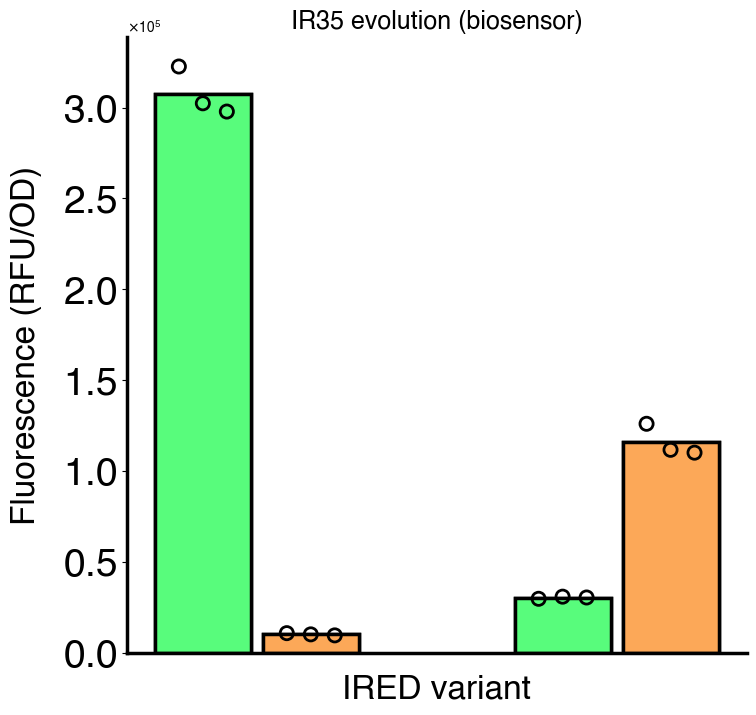

In [5]:
#create plots
fig, ax = plt.subplots(figsize=(8, 8))
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

# The x locations for the groups
x = np.arange(2)*3

# Width of each bar
bar_width = 0.5

# Plot bars for each group
avgS = [i["avgS"] for i in data_dict.values()]
avgR = [i["avgR"] for i in data_dict.values()]
offset = [-0.2, 0, 0.2]

for i in range(0,len(IREDs)):
    plt.bar(x, avgS, color="#58fc7c", edgecolor="black", linewidth=2.5)
    c = 0
    for k in data_dict[IREDs[i]]["S"]:
        plt.scatter(x[i]+offset[c], k, edgecolor="#000000", color="None", s=90, zorder=20, linewidth=2.0)
        c += 1
    plt.bar(x+0.9, avgR, color="#fca858", edgecolor="black", linewidth=2.5)
    c = 0
    for k in data_dict[IREDs[i]]["R"]:
        plt.scatter(x[i]+0.9+offset[c], k, edgecolor="#000000", color="None", s=90, zorder=20, linewidth=2.0)
        c += 1 


plt.title("IR35 evolution (biosensor)", fontsize=18)
plt.xlabel("IRED variant", fontsize=24, labelpad=15)
plt.ylabel("Fluorescence (RFU/OD)", fontsize=24, labelpad=15)
plt.yticks(size=28)
plt.xticks([])
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Setting y-axis to scientific notation
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# plt.savefig("SVG/IR35evolution_biosensor.svg", format="svg")
plt.show()
# print("saved figure to SVG/IR35evolution_biosensor.svg")


In [6]:
# plot HPLC data

# Get labels (doesn't change order)
x = data["Name"]
l = [i[:-2] for i in list(x)]
IREDs = list(dict.fromkeys(l))

# set HPLC data
yS = data["S-Area"]
yR = data["R-Area"]

#process data via a dictionary
data_dict = {}
for i in range(0,len(x)):
    l = x[i][:-2]
    if l not in data_dict:
        data_dict[l] = {"S": [yS[i]], "R": [yR[i]]}
    else:
        data_dict[l]["S"].append(yS[i])
        data_dict[l]["R"].append(yR[i])
#calculate averages
for i in data_dict.keys():
    data_dict[i]["avgS"] = mean(data_dict[i]["S"])
    data_dict[i]["avgR"] = mean(data_dict[i]["R"])

print(data_dict)

{'IR35': {'S': [np.float64(13053592.0), np.float64(12876939.0), np.float64(15943769.0)], 'R': [np.float64(2350659.75), np.float64(3067020.0), np.float64(1939202.75)], 'avgS': np.float64(13958100.0), 'avgR': np.float64(2452294.1666666665)}, 'S2C4': {'S': [np.float64(640930.0), np.float64(827661.6875), np.float64(660724.625)], 'R': [np.float64(31847270.0), np.float64(32734594.0), np.float64(32222356.0)], 'avgS': np.float64(709772.1041666666), 'avgR': np.float64(32268073.333333332)}}


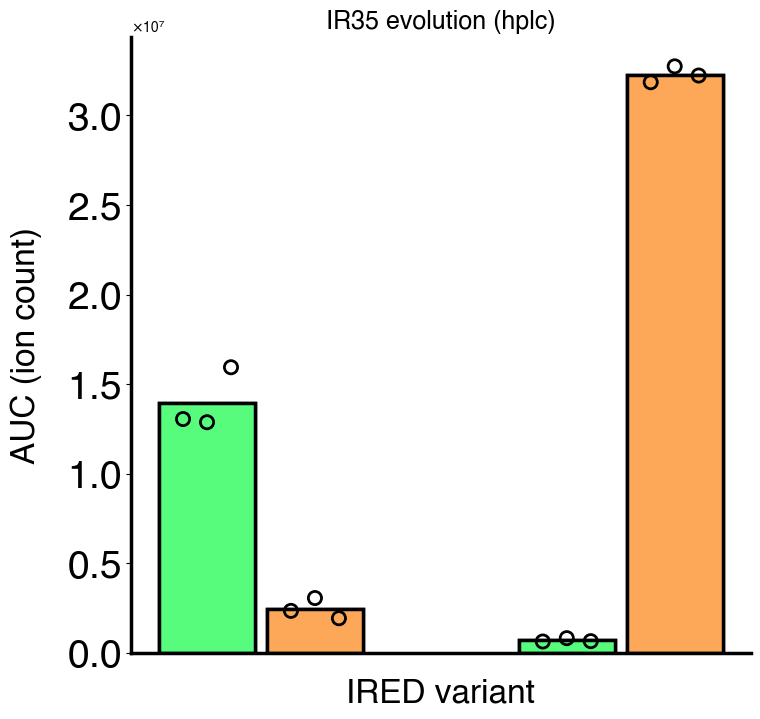

In [7]:
#create plots
fig, ax = plt.subplots(figsize=(8, 8))
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

# The x locations for the groups
x = np.arange(2)*3

# Width of each bar
bar_width = 0.5

# Plot bars for each group
avgS = [i["avgS"] for i in data_dict.values()]
avgR = [i["avgR"] for i in data_dict.values()]
offset = [-0.2, 0, 0.2]

for i in range(0,len(IREDs)):
    plt.bar(x, avgS, color="#58fc7c", edgecolor="black", linewidth=2.5)
    c = 0
    for k in data_dict[IREDs[i]]["S"]:
        plt.scatter(x[i]+offset[c], k, edgecolor="#000000", color="None", s=90, zorder=20, linewidth=2.0)
        c += 1
    plt.bar(x+0.9, avgR, color="#fca858", edgecolor="black", linewidth=2.5)
    c = 0
    for k in data_dict[IREDs[i]]["R"]:
        plt.scatter(x[i]+0.9+offset[c], k, edgecolor="#000000", color="None", s=90, zorder=20, linewidth=2.0)
        c += 1 


plt.title("IR35 evolution (hplc)", fontsize=18)
plt.xlabel("IRED variant", fontsize=24, labelpad=18)
plt.ylabel("AUC (ion count)", fontsize=24, labelpad=18)
plt.yticks(size=28)
plt.xticks([])
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Setting y-axis to scientific notation
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# plt.savefig("SVG/IR35evolution_HPLC.svg", format="svg")
plt.show()
# print("saved figure to SVG/IR35evolution_HPLC.svg")